In [3]:
#This model follows the model detailed in Hethcote (1976) where immunity is lost after a certain time period

In [34]:
#numpy is an advanced numeracy package. Can integrate things, find prime numpers, graph gaussian distribution.
import numpy as np
#scipy package for maths shit, integrate is section within scipy and odient is funtion WITHIN integrate. Saves downloading many functions
#odeint integrates things
from scipy.integrate import odeint
#plotting package 
import matplotlib.pyplot as plt
#google packages or functions if unknown


In [112]:
# Total population, N.
N = 50
# Initial number of exposed, infected and recovered individuals: E0, I0 and R0.
E0, I0, R0 = 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - (E0 + I0 + R0)

"""
beta = contact rate, proportion of susceptibles contracting infection daily.
epsilon = time from exposure to infectious. When epsilon = 1/x, x = number of days exposed before infection.
gamma = recovery rate. When gamma = 1/x, x = number of days of infection.
zeta = birth rate
delta = natural death rate, unrelated to infection
rho = death rate due to disease
sigma = total number of contacts by infected
alpha = daily loss of immunity rate. When alpha = 1/x, x = number of days immune.

"""

beta = 0.1
epsilon = 1/60
gamma = 1/60
zeta = 0
delta = 0 
rho = 0.1/60
alpha = 1/60

# A grid of time points (in days)
#linspace is function from numpy
# sets t to start at 0, go to 180, and put 160 values between
t = np.linspace(0, 1768,1768)


In [113]:
# The SEIRS model differential equations.
def deriv(y, t, N, beta, epsilon, gamma, zeta, delta, rho, alpha):
    S, E, I, R = y
    dSdt = (-beta * S * I/N) + (alpha * R) + (zeta * (S + E + R)) - (delta * S)
    dEdt = (beta * S * I/N) - ((epsilon + delta) * E)
    dIdt = epsilon * E - ((gamma + delta + rho) * I)
    dRdt = gamma * I - ((delta + alpha) * R)
    return dSdt, dEdt, dIdt, dRdt


In [114]:
# Initial conditions vector
y0 = S0, E0, I0, R0
# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, epsilon, gamma, zeta, delta, rho, alpha))
S, E, I, R = ret.T


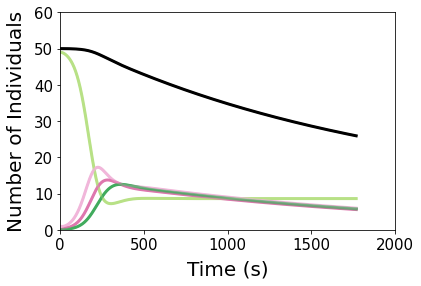

In [115]:
# Plot the data on three separate curves for S(t), E(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
plt.plot(t,(S+E+I+R),linewidth=3,color='black')
plt.plot(t,S,linewidth=3,color='#B8E186')
plt.plot(t,E,linewidth=3,color='#F1B6DA')
plt.plot(t,I,linewidth=3,color='#DE77AE')
plt.plot(t,R,linewidth=3,color='#41AB5D')
plt.xticks(np.arange(0, 2001, 500),fontsize=15)
plt.yticks(fontsize=15)

# can write S, E, I, or R as /N to get proportions, or leave as individual values to get counts
ax.plot(t, (S + E + I + R), color ='black', alpha=0.5, lw=2, label='Total Population')
ax.plot(t, S, '#B8E186', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E, '#F1B6DA', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, '#DE77AE', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R, '#41AB5D', alpha=0.5, lw=2, label='Recovered')

#all of this is aesthetic can change y lim to be 1.2 for proportions or (N + 0.2*N) for individuals
ax.set_xlabel('Time (s)',fontsize=20,labelpad=8)
ax.set_ylabel('Number of Individuals',fontsize=20,labelpad=8)
ax.set_ylim(0,(N + 0.2*N))
ax.grid(visible=False)
ax.set_facecolor('white')
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)
plt.xlim(0,2000)

plt.savefig('SEIRS_python_plot_pres.png',dpi=300,bbox_inches='tight')

plt.show()